In [72]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.linear_model import LogisticRegression

import seaborn as sn
from sklearn.ensemble import RandomForestRegressor
import nltk
from sklearn.metrics import roc_auc_score, f1_score
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats.stats import pearsonr
from scipy import stats


In [38]:
df_train = pd.read_csv('merged_cleaned_sentiment_train.csv')
df_validation = pd.read_csv('merged_cleaned_sentiment_validation.csv')
df_test = pd.read_csv('merged_cleaned_sentiment_test.csv')

In [39]:
df = pd.concat([df_train,df_validation,df_test])
# new_df = pd.concat(pdList)

<AxesSubplot:>

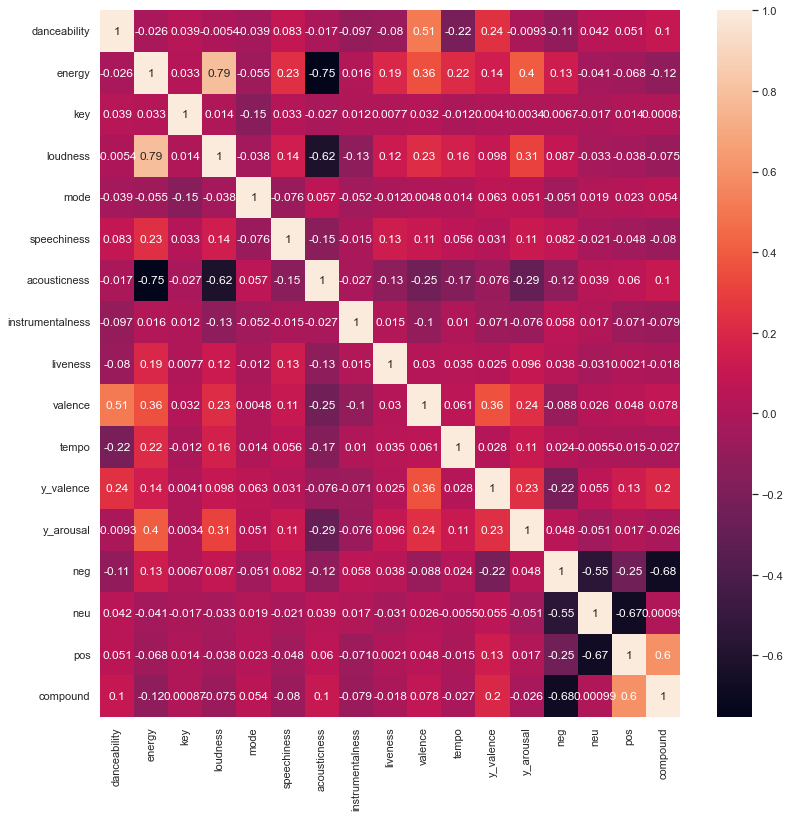

In [40]:
corrMatrix = df[['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo','y_valence', 'y_arousal', 'neg','neu','pos','compound']].corr()
sn.set(rc={'figure.figsize':(13,13)})

sn.heatmap(corrMatrix, annot=True)

# print(corrMatrix)

In [10]:
df.neu.describe()


count    7596.000000
mean        0.761361
std         0.098693
min         0.175000
25%         0.702000
50%         0.770000
75%         0.831000
max         1.000000
Name: neu, dtype: float64

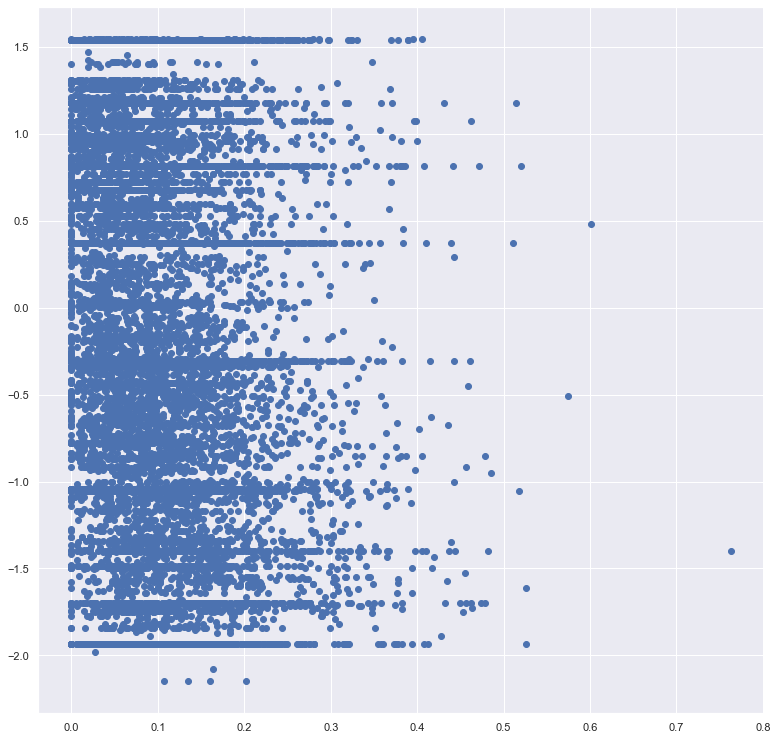

In [41]:
plt.scatter(df.neg,df.y_valence)

# Correlation between valence and sentiment

<AxesSubplot:>

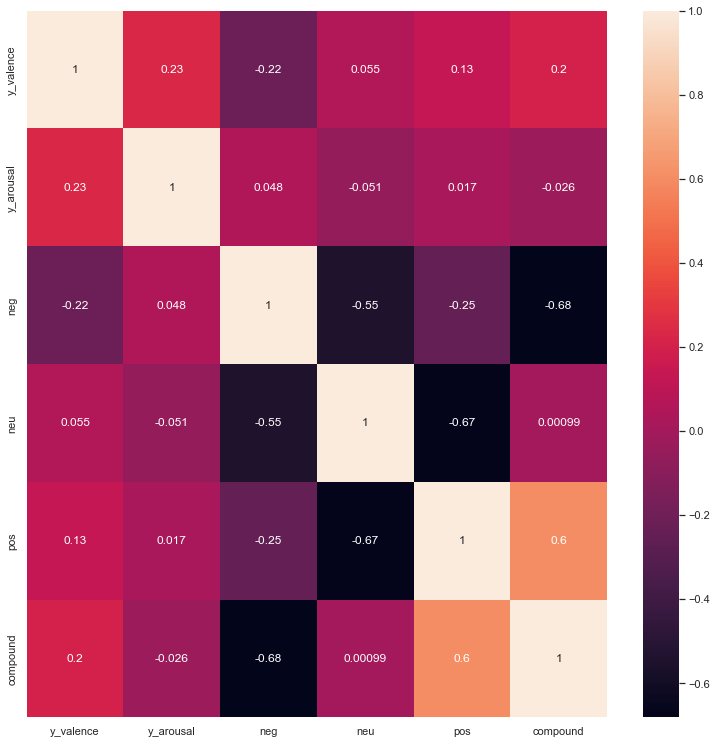

In [42]:
corrMatrix = df[['y_valence', 'y_arousal', 'neg','neu','pos','compound']].corr()
sn.set(rc={'figure.figsize':(13,13)})

sn.heatmap(corrMatrix, annot=True)

In [43]:
x_vars = [ 'neg','neu','pos','compound']
y_vars = ['y_valence', 'y_arousal']

In [45]:
for y in y_vars:
    for x in x_vars:
        r,p = pearsonr(df[x],df[y])
      
        print(f'For {x =} and {y = }, pearsons {r =} with {p =}')

For x ='neg' and y = 'y_valence', pearsons r =-0.2211659212558971 with p =4.502079279020964e-138
For x ='neu' and y = 'y_valence', pearsons r =0.05504264620469499 with p =7.634857217716082e-10
For x ='pos' and y = 'y_valence', pearsons r =0.13181635094063437 with p =1.7759809200035235e-49
For x ='compound' and y = 'y_valence', pearsons r =0.2016308337930724 with p =1.3075951508930892e-114
For x ='neg' and y = 'y_arousal', pearsons r =0.04774156827786184 with p =9.540535212430449e-08
For x ='neu' and y = 'y_arousal', pearsons r =-0.05146564642339331 with p =8.82074249079319e-09
For x ='pos' and y = 'y_arousal', pearsons r =0.017429163416932084 with p =0.0515588435308778
For x ='compound' and y = 'y_arousal', pearsons r =-0.02576360222084772 with p =0.004002097036981392


In [26]:
len(df)

7596

In [52]:
for y in y_vars:
    for x in x_vars:
        r,p = pearsonr(df[x],df[y])
        dof = len(df) -2
        if p < 0.05 and r >0:
            print(f'A positive correlation was found between {x} and {y}, {r = :.2}, p({dof}) = {p:.3}')
#             print(f'For {x =} and {y = }, pearsons {r =} with p({dof}) = {p}')
        if p < 0.05 and r <0:
            print(f'A negative correlation was found between {x} and {y}, {r = :.2}, p({dof}) = {p:.3}')

A negative correlation was found between neg and y_valence, r = -0.22, p(12475) = 4.5e-138
A positive correlation was found between neu and y_valence, r = 0.055, p(12475) = 7.63e-10
A positive correlation was found between pos and y_valence, r = 0.13, p(12475) = 1.78e-49
A positive correlation was found between compound and y_valence, r = 0.2, p(12475) = 1.31e-114
A positive correlation was found between neg and y_arousal, r = 0.048, p(12475) = 9.54e-08
A negative correlation was found between neu and y_arousal, r = -0.051, p(12475) = 8.82e-09
A negative correlation was found between compound and y_arousal, r = -0.026, p(12475) = 0.004


In [14]:
pearsonr(df.compound,df.y_valence)

(0.19842355904236308, 2.6614629632340983e-68)

# compare sign of compound sentiment with mode

In [57]:
df[['mode']]

<bound method DataFrame.count of       mode
0        0
1        0
2        0
3        0
4        1
...    ...
2318     1
2319     1
2320     1
2321     1
2322     1

[12477 rows x 1 columns]>

In [69]:
df['y_val_bin'] = np.sign(df["y_valence"])
# df.mode

In [59]:
df['y_val_bin']

0      -1.0
1       1.0
2       1.0
3      -1.0
4       1.0
       ... 
2318   -1.0
2319   -1.0
2320   -1.0
2321    1.0
2322    1.0
Name: y_val_bin, Length: 12477, dtype: float64

array([[<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'y_val_bin'}>]], dtype=object)

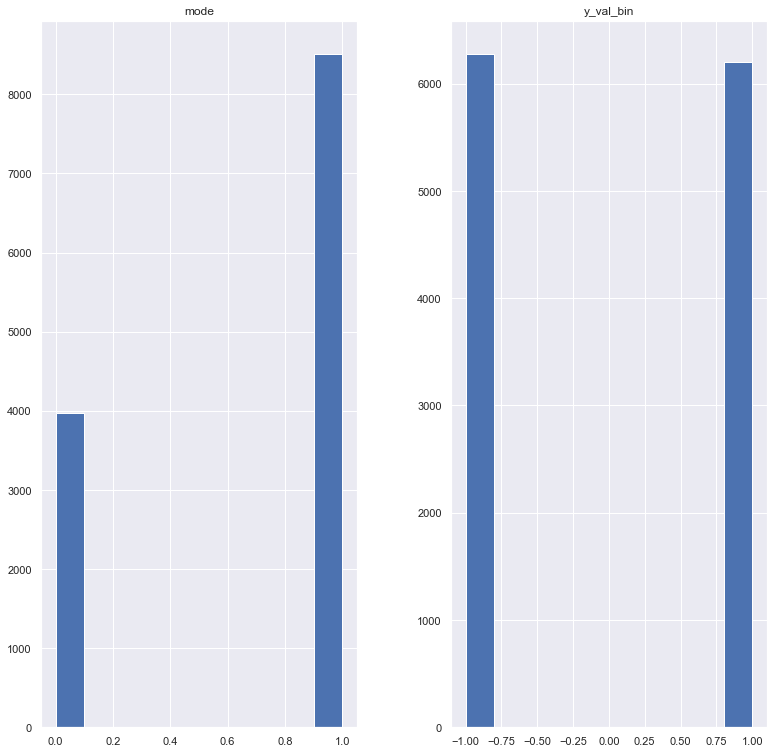

In [71]:
df[['mode','y_val_bin']].hist()

In [60]:
plt.bar(df['mode'].unique(), df['mode'])

TypeError: bar() missing 1 required positional argument: 'height'

# ttest minor v major on valence (and compound)

In [77]:
df.groupby('mode')['y_valence','compound'].describe()

C:\Users\tibor\AppData\Local\Temp/ipykernel_8384/3058856436.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('mode')['y_valence','compound'].describe()


y_valence                                                              \
         count      mean       std       min       25%       50%       75%   
mode                                                                         
0       3970.0 -0.195067  1.004866 -2.148097 -1.040199 -0.308878  0.722613   
1       8507.0 -0.053110  1.076952 -2.148097 -1.040199  0.070427  0.848139   

               compound                                                 \
           max    count      mean       std     min       25%      50%   
mode                                                                     
0     1.546714   3970.0  0.181445  0.863164 -0.9999 -0.895775  0.72205   
1     1.546714   8507.0  0.280195  0.834346 -1.0000 -0.778200  0.84830   

                        
           75%     max  
mode                    
0     0.979275  0.9999  
1     0.982500  0.9999

In [112]:
def get_dof(x,y):
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

In [74]:
df[df['mode'] == 0].y_valence

0      -0.682725
1       0.373325
2       1.071901
3      -1.056572
11     -0.780962
          ...   
2308   -0.308878
2312   -0.780962
2314    0.678952
2315    0.373325
2316   -0.461691
Name: y_valence, Length: 3970, dtype: float64

for valence

In [123]:
group1 = df[df['mode'] == 0].y_valence
group2 = df[df['mode'] == 1].y_valence

In [124]:
ttest_valence = stats.ttest_ind(group1, group2, equal_var = False)

In [125]:
ttest_valence

Ttest_indResult(statistic=-7.1819792111608365, pvalue=7.46784078275214e-13)

In [126]:
f'''The {len(group1)} minor songs (M = {group1.mean():.2}, SD = {group1.std():.2}) compared to the {len(group2)} major songs (M = {group2.mean():.2}, SD = {group2.std():.2}) have a significantly higher valence,
t({get_dof(group1,group2):.1}) = {ttest_valence[0]:.3}, p = {ttest_valence[1]:.3} '''

'The 3970 minor songs (M = -0.2, SD = 1.0) compared to the 8507 major songs (M = -0.053, SD = 1.1) have a significantly higher valence,\nt(8e+03) = -7.18, p = 7.47e-13 '

In [83]:
ttest_valence[1]

1.8798627290759968e-09

for compound

In [127]:
group1 = df[df['mode'] == 0].compound
group2 = df[df['mode'] == 1].compound
ttest_compound = stats.ttest_ind(group1, group2, equal_var = False)


In [128]:
f'''The {len(group1)} minor songs (M = {group1.mean():.2}, SD = {group1.std():.2}) compared to the {len(group2)} major songs (M = {group2.mean():.2}, SD = {group2.std():.2}) have significantly higher compound sentiment scores,
t({get_dof(group1,group2):.1}) = {ttest_compound[0]:.3}, p = {ttest_compound[1]:.3} '''

'The 3970 minor songs (M = 0.18, SD = 0.86) compared to the 8507 major songs (M = 0.28, SD = 0.83) have significantly higher compound sentiment scores,\nt(8e+03) = -6.02, p = 1.88e-09 '

# eyeball for a song

In [129]:
df.columns

Index(['Unnamed: 0', 'artist', 'trackname', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'id', 'time_signature', 'lyrics',
       'lyrics_cleaned', 'y_valence', 'y_arousal', 'neg', 'neu', 'pos',
       'compound', 'y_val_bin'],
      dtype='object')

In [133]:
for i in range(1000):
    print(df[['artist', 'trackname','y_valence', 'y_arousal', 'compound']].iloc[i])

artist          Dark Tranquillity
trackname    Insanity's Crescendo
y_valence               -0.682725
y_arousal                0.316758
compound                  -0.9059
Name: 0, dtype: object
artist       Duke Ellington
trackname           Caravan
y_valence          0.373325
y_arousal         -0.923151
compound             0.9909
Name: 1, dtype: object
artist           Ella Fitzgerald
trackname    Lullaby Of Birdland
y_valence               1.071901
y_arousal                0.84683
compound                  0.9456
Name: 2, dtype: object
artist       cLOUDDEAD
trackname     Pop Song
y_valence    -1.056572
y_arousal     0.736206
compound         0.984
Name: 3, dtype: object
artist        Boney M
trackname    Rasputin
y_valence    1.541257
y_arousal    1.704165
compound        0.998
Name: 4, dtype: object
artist       Leona Lewis
trackname      I Will Be
y_valence       0.007664
y_arousal       0.791518
compound          0.9167
Name: 5, dtype: object
artist         Leona Lewis
trackname 

artist         Peter Tosh
trackname    Equal Rights
y_valence        0.373325
y_arousal       -0.923151
compound            0.999
Name: 80, dtype: object
artist          Bill Withers
trackname    Grandma's Hands
y_valence           -1.93525
y_arousal           -0.65581
compound              0.8763
Name: 81, dtype: object
artist                     OutKast
trackname    Makes No Sense At All
y_valence                 0.373325
y_arousal                -0.923151
compound                    -0.996
Name: 82, dtype: object
artist                        OutKast
trackname    When I Look In Your Eyes
y_valence                    0.747172
y_arousal                   -0.835573
compound                       0.4369
Name: 83, dtype: object
artist          OutKast
trackname    A Bad Note
y_valence      -1.93525
y_arousal      -0.65581
compound        -0.9844
Name: 84, dtype: object
artist                  Kenny G
trackname    If I Ain't Got You
y_valence              0.722613
y_arousal              -

artist       Michael Penn
trackname     Walter Reed
y_valence       -0.595949
y_arousal       -0.648435
compound          -0.9941
Name: 163, dtype: object
artist                               The Zutons
trackname    Oh Stacey (Look What You've Done!)
y_valence                              1.541257
y_arousal                              1.704165
compound                                -0.9687
Name: 164, dtype: object
artist             Kat DeLuna
trackname    Feel What I Feel
y_valence            0.984579
y_arousal           -0.010504
compound               0.4913
Name: 165, dtype: object
artist                 Kat DeLuna
trackname    Enjoy Saying Goodbye
y_valence                1.541257
y_arousal                1.704165
compound                   0.8768
Name: 166, dtype: object
artist                   Warrant
trackname    Sometimes She Cries
y_valence               -1.93525
y_arousal               -0.65581
compound                 -0.9928
Name: 167, dtype: object
artist        Warran

Name: 250, dtype: object
artist       Anthony Hamilton
trackname             Lucille
y_valence            0.270995
y_arousal           -0.618935
compound                0.998
Name: 251, dtype: object
artist            Aaliyah
trackname    Street Thing
y_valence        0.919088
y_arousal       -0.632763
compound           -0.997
Name: 252, dtype: object
artist       Anthony Hamilton
trackname               Float
y_valence            1.071901
y_arousal             0.84683
compound               0.9728
Name: 253, dtype: object
artist       Delta Goodrem
trackname    Innocent Eyes
y_valence         0.875427
y_arousal        -0.743387
compound           -0.2705
Name: 254, dtype: object
artist       Delta Goodrem
trackname        Butterfly
y_valence         0.722613
y_arousal         -0.03816
compound             0.892
Name: 255, dtype: object
artist        Delta Goodrem
trackname    This Is Not Me
y_valence          1.541257
y_arousal          1.704165
compound            -0.2445
Name: 256,

Name: 326, dtype: object
artist       Ben Folds Five
trackname          Lullabye
y_valence           0.31693
y_arousal         -0.145711
compound             0.9325
Name: 327, dtype: object
artist               Wheatus
trackname    Teenage Dirtbag
y_valence           1.178325
y_arousal           1.183311
compound             -0.5788
Name: 328, dtype: object
artist         Pearl Jam
trackname    Off He Goes
y_valence      -1.040199
y_arousal      -0.065816
compound          0.9887
Name: 329, dtype: object
artist            Ben Folds
trackname    Carrying Cathy
y_valence         -0.628149
y_arousal         -1.494707
compound            -0.8778
Name: 330, dtype: object
artist         Ginuwine
trackname    So Anxious
y_valence     -0.658166
y_arousal      0.869877
compound        -0.8794
Name: 331, dtype: object
artist         David Poe
trackname    The Drifter
y_valence      -1.040199
y_arousal      -0.065816
compound         -0.8944
Name: 332, dtype: object
artist               Alice Pea

artist          Backstreet Boys
trackname    I Need You Tonight
y_valence              1.071901
y_arousal               0.84683
compound                -0.9772
Name: 384, dtype: object
artist               Backstreet Boys
trackname    No One Else Comes Close
y_valence                   0.875427
y_arousal                  -0.743387
compound                      0.9722
Name: 385, dtype: object
artist              Michael Bolton
trackname    Only A Woman Like You
y_valence                 0.020763
y_arousal                -0.578373
compound                    0.9954
Name: 386, dtype: object
artist       Groove Armada
trackname     Groove Is On
y_valence         0.373325
y_arousal        -0.923151
compound            0.9752
Name: 387, dtype: object
artist       Groove Armada
trackname         Remember
y_valence         0.526139
y_arousal        -1.628377
compound             0.765
Name: 388, dtype: object
artist       Sarah McLachlan
trackname             Answer
y_valence          -0.48040

artist       Jolie Holland
trackname      I Wanna Die
y_valence        -1.040199
y_arousal        -0.065816
compound           -0.9937
Name: 435, dtype: object
artist       Jolie Holland
trackname      Ghost Waltz
y_valence        -1.040199
y_arousal        -0.065816
compound            0.9596
Name: 436, dtype: object
artist       Jolie Holland
trackname           Sascha
y_valence        -0.341624
y_arousal        -0.093472
compound             0.984
Name: 437, dtype: object
artist       Jolie Holland
trackname      Black Stars
y_valence        -0.308878
y_arousal        -0.102691
compound           -0.5859
Name: 438, dtype: object
artist                Jolie Holland
trackname    Old Fashioned Morphine
y_valence                 -0.674539
y_arousal                 -0.084253
compound                     0.9944
Name: 439, dtype: object
artist           Jolie Holland
trackname    Mad Tom Of Bedlam
y_valence              1.25746
y_arousal             1.086515
compound               -0.9949


Name: 516, dtype: object
artist              Wilco
trackname    Sky Blue Sky
y_valence       -0.497556
y_arousal       -0.393737
compound            0.746
Name: 517, dtype: object
artist              Wilco
trackname    Hate It Here
y_valence       -1.036106
y_arousal        0.067854
compound          -0.9585
Name: 518, dtype: object
artist             Annie
trackname    Me Plus One
y_valence       1.541257
y_arousal       1.704165
compound          0.9945
Name: 519, dtype: object
artist          Annie
trackname    Anniemal
y_valence    0.957291
y_arousal    0.390507
compound      -0.1226
Name: 520, dtype: object
artist              Annie
trackname    No Easy Love
y_valence        1.541257
y_arousal        1.704165
compound            0.994
Name: 521, dtype: object
artist               Annie
trackname    Come Together
y_valence         1.541257
y_arousal         1.704165
compound            0.9954
Name: 522, dtype: object
artist       DUNCAN SHEIK
trackname    Longing Town
y_valence    

Name: 594, dtype: object
artist       Solomon Burke
trackname    The Judgement
y_valence         -1.93525
y_arousal         -0.65581
compound           -0.6115
Name: 595, dtype: object
artist       The Get Up Kids
trackname            Overdue
y_valence          -1.054753
y_arousal          -0.151857
compound              -0.782
Name: 596, dtype: object
artist          Meshuggah
trackname    Electric Red
y_valence       -1.400403
y_arousal        1.538229
compound          -0.9538
Name: 597, dtype: object
artist                 Meshuggah
trackname    This Spiteful Snake
y_valence              -1.400403
y_arousal               1.538229
compound                 -0.9228
Name: 598, dtype: object
artist       Zeromancer
trackname     Eurotrash
y_valence     -0.308878
y_arousal     -0.102691
compound         0.6486
Name: 599, dtype: object
artist       Zeromancer
trackname       Wannabe
y_valence     -1.171182
y_arousal      1.436824
compound        -0.2495
Name: 600, dtype: object
artist    

artist       James Taylor
trackname    There We Are
y_valence       -1.040199
y_arousal       -0.065816
compound            0.995
Name: 642, dtype: object
artist                       James Taylor
trackname    Looking For Love On Broadway
y_valence                       -1.040199
y_arousal                       -0.065816
compound                           0.9744
Name: 643, dtype: object
artist           Billy Joel
trackname    And So It Goes
y_valence         -0.800064
y_arousal          0.159119
compound             -0.111
Name: 644, dtype: object
artist       Indigo Girls
trackname         Galileo
y_valence        1.080997
y_arousal        0.871413
compound           0.1637
Name: 645, dtype: object
artist       Michael Jackson
trackname       Baby Be Mine
y_valence            0.75354
y_arousal           0.195379
compound              0.9972
Name: 646, dtype: object
artist       Ben Folds Five
trackname               Air
y_valence         -0.270674
y_arousal         -0.099618
compound

artist               Mobb Deep
trackname    Apostle's Warning
y_valence            -0.308878
y_arousal            -0.102691
compound               -0.9958
Name: 690, dtype: object
artist       System of a Down
trackname          Chop Suey!
y_valence           -1.700572
y_arousal            1.842444
compound              -0.9962
Name: 691, dtype: object
artist                  Train
trackname    I Wish You Would
y_valence            0.815393
y_arousal            0.662457
compound               0.9813
Name: 692, dtype: object
artist                Train
trackname    Something More
y_valence         -1.056572
y_arousal          0.736206
compound             0.9365
Name: 693, dtype: object
artist       Newton Faulkner
trackname     Dream Catch Me
y_valence          -0.006889
y_arousal           0.041735
compound               0.923
Name: 694, dtype: object
artist                         Hi-Five
trackname    She's Playing Hard To Get
y_valence                     0.373325
y_arousal         

artist            Abba
trackname    Mamma Mia
y_valence     1.213799
y_arousal     1.267815
compound       -0.9942
Name: 757, dtype: object
artist                Abba
trackname    Super Trouper
y_valence         1.284748
y_arousal         1.436824
compound            0.9982
Name: 758, dtype: object
artist                          Abba
trackname    The Winner Takes It All
y_valence                  -0.911945
y_arousal                   0.365156
compound                      0.9832
Name: 759, dtype: object
artist             Abba
trackname    Chiquitita
y_valence      0.015851
y_arousal      0.390507
compound         -0.981
Name: 760, dtype: object
artist                                              Abba
trackname    Gimme! Gimme! Gimme! (A Man After Midnight)
y_valence                                       0.253257
y_arousal                                       0.279883
compound                                         -0.9856
Name: 761, dtype: object
artist       Charlotte Sometimes
tr

artist       The Puppini Sisters
trackname             Mr Sandman
y_valence               1.541257
y_arousal               1.704165
compound                  0.9579
Name: 880, dtype: object
artist       The Puppini Sisters
trackname       Jeepers Creepers
y_valence                1.25746
y_arousal               1.086515
compound                 -0.8832
Name: 881, dtype: object
artist       The Puppini Sisters
trackname         I Will Survive
y_valence              -1.744233
y_arousal               1.335419
compound                  0.8491
Name: 882, dtype: object
artist       The Puppini Sisters
trackname         Heart Of Glass
y_valence               0.056783
y_arousal               0.705478
compound                  0.9748
Name: 883, dtype: object
artist       The Puppini Sisters
trackname                   Sway
y_valence               1.541257
y_arousal               1.704165
compound                  0.8074
Name: 884, dtype: object
artist       The Puppini Sisters
trackname        

Name: 974, dtype: object
artist                     Arcade Fire
trackname    Neighborhood #1 (Tunnels)
y_valence                     -0.74003
y_arousal                     0.215353
compound                          0.68
Name: 975, dtype: object
artist       Arcade Fire
trackname        Wake Up
y_valence      -1.450886
y_arousal      -0.317024
compound           0.868
Name: 976, dtype: object
artist       Arcade Fire
trackname          Haiti
y_valence      -0.006889
y_arousal       0.041735
compound         -0.7003
Name: 977, dtype: object
artist            Arcade Fire
trackname    Rebellion (Lies)
y_valence            0.140467
y_arousal            0.570271
compound              -0.9752
Name: 978, dtype: object
artist                Lush
trackname    Outside World
y_valence         -1.93525
y_arousal         -0.65581
compound           -0.8702
Name: 979, dtype: object
artist       The Breeders
trackname         Off You
y_valence       -1.040199
y_arousal       -0.065816
compound        

In [134]:
df[['artist', 'trackname','y_valence', 'y_arousal', 'compound']].head(1000)

,artist,trackname,y_valence,y_arousal,compound
0,Dark Tranquillity,Insanity's Crescendo,-0.682725,0.316758,-0.9059
1,Duke Ellington,Caravan,0.373325,-0.923151,0.9909
2,Ella Fitzgerald,Lullaby Of Birdland,1.071901,0.846830,0.9456
3,cLOUDDEAD,Pop Song,-1.056572,0.736206,0.9840
4,Boney M,Rasputin,1.541257,1.704165,0.9980
...,...,...,...,...,...
995,Red House Painters,San Geronimo,-0.427126,0.444282,0.7506
996,Red House Painters,Shadows,-1.048386,0.335195,-0.2732
997,Red House Painters,Over My Head,-1.056572,0.736206,-0.8437
998,Red House Painters,Drop,-1.274877,-0.145711,-0.9581
